# Question 1

Consider the first 10000 digits of $\sqrt{2}$ and present them as a "random walk" by converting them in base 4, representing 4 directions (up, down, left and right). 

We know that $\sqrt{2}$ is an irrational number and irrational numbers have decimal expansions that neither terminate nor become periodic.

Write a code to produce this random walk. Try this code with $\sqrt{3}$
 $\sqrt{6}$ and $\sqrt{13}$.

Is there any comparison one can make among these numbers?

In [253]:
import mpmath
from functools import reduce

In [254]:
# a function to convert any digit from base10 to any other base
def decimalDigit_to_base4(digit):
    num = int(digit)
    if num == 0:
        return "0"
    result = []
    while num > 0:
        result.append(str(num % 4))
        num //= 4
    return ''.join(result[::-1])

#print(base10_to_baseN(10))

In [255]:
def createIrrationalDigits(resolution, number):
    # for example: Set the precision to 10,000 digits
    mpmath.mp.dps = resolution
    return str(number)

#print(createIrrationalDigitsWithSqrt(1000, 2))

In [256]:
def CreateBase4DigitsString(Q_Digits):
    # uses list comprehension to create a list of digits if they are a digit (prevents the decimal point for throwing error)
    # and converts each of the conditionally selected elements from base10 to base4 then assigns that 
    # list to the variable base4_digits
    base4_digits = [ decimalDigit_to_base4(n) for n in Q_Digits if n.isdigit() ]
    # functools.reduce recursively executes the lambda expression of joining each of the previous digits
    # consequently joining the entire list together
    return reduce(lambda x, y: ''.join([x,y]), base4_digits)

#print(CreateBase4DigitsString(Q_Digits))

In [257]:
def MapBase4DigitsAsDirections(base4_digits):
    # direction dictionary 
    direction_mapping = {
        '0': 'Up',
        '1': 'Down',
        '2': 'Left',
        '3': 'Right'
    }
    # Convert each digit to its corresponding direction
    result = [direction_mapping[digit] for digit in base4_digits]
    return result

#print(MapBase4DigitsAsDirections(base4_digits))

In [258]:
# To visualize random walk
import matplotlib.pyplot as plt

def CreateRandomWalkGraph(mapped_directions):
    # Starting position
    x, y = 0, 0
    # Lists to store the positions
    x_positions = [x]
    y_positions = [y]
    # Define movement deltas for each direction
    movement = {
        'Up': (0, 1),
        'Down': (0, -1),
        'Left': (-1, 0),
        'Right': (1, 0)
    }
    
    # Process each direction
    for direction in mapped_directions:
        dx, dy = movement[direction]
        x += dx
        y += dy
        x_positions.append(x)
        y_positions.append(y)
    
    # Create the plot
    plt.plot(x_positions, y_positions, marker='o')
    plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.grid()
    plt.xlim(min(x_positions) - 1, max(x_positions) + 1)
    plt.ylim(min(y_positions) - 1, max(y_positions) + 1)
    plt.show()

    # Return final coordinates
    return x, y

Write a code to produce this random walk. Try this code with $\sqrt{2}$, $\sqrt{3}$
 $\sqrt{6}$ and $\sqrt{13}$.

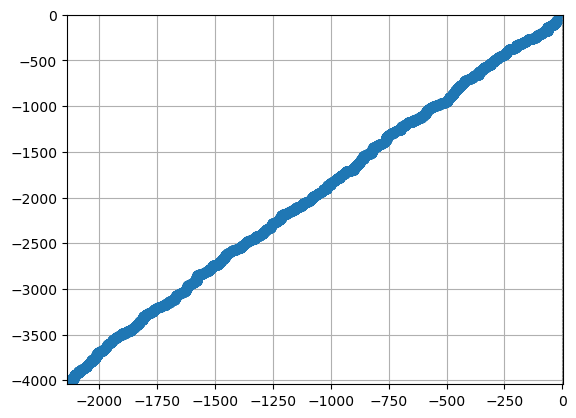

Final coordinates: ( -2138 , -4043 )
slope: 1.891019644527596


In [259]:
# Calculate the square root of 2 and convert it to a string
Q_Digits = createIrrationalDigits(10000, mpmath.sqrt(2))
# create the base4 digits string
base4_digits = CreateBase4DigitsString(Q_Digits)
# map the digits to the direction up(0), left(2), down(1), right(3)
mapped_directions = MapBase4DigitsAsDirections(base4_digits)
# show a graph for fun
final_x, final_y = CreateRandomWalkGraph(mapped_directions)

print("Final coordinates: (", final_x, ",", final_y, ")")
print(f"slope: {final_y / final_x}")

# (2) 
### Chapter 5 - problem 8.
Consider a positive integer. Sort the decimal digits of this number in ascending and descending order. 

Calculate the difference of these two numbers (for example, starting from 5742 , we get $7542-2457=5085$ ). This is called the Kaprekar routine. 

First check that starting with any 4-digit number and repeating the Kaprekar routine, you always reach either 0 or 6174 . 

Then find out, among all the 4-digit numbers, what is the maximum number of iterations needed in order to get to 6174 .

In [265]:
n = 5472

def g(list):
    return int(''.join(map(str, list)))
    
numberOfIterations = 0
while n != 6174:
    n = [int(n) for n in str(n)]
    
    n_sorted = sorted(n)
    n_reversed = n_sorted[::-1]
    n = g(n_reversed) - g(n_sorted)
    
    numberOfIterations += 1
    print(n)

print(f"it took {numberOfIterations} loops to ")

5085
7992
7173
6354
3087
8352
6174
it took 7 loops to 
